In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [4]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [6]:
ls data

men_shoes.csv


In [8]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [9]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [10]:
mean_price = np.mean ( df['prices_amountmin'] )
mean_price

93.53952188183217

In [11]:
[1] * 5

[1, 1, 1, 1, 1]

In [13]:
y_true = df['prices_amountmin']
y_true.shape[0]

18280

In [14]:
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

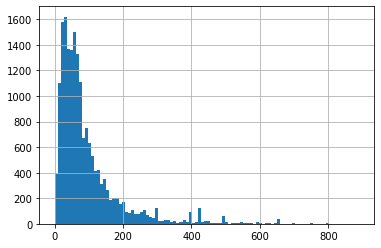

In [15]:
df['prices_amountmin'].hist(bins=100)

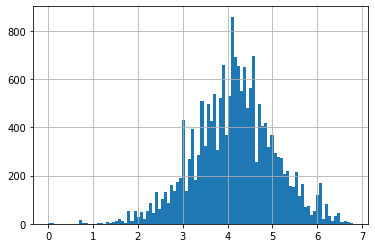

In [24]:
np.log1p(df['prices_amountmin']).hist(bins=100) # to samo co np.log(df['prices_amountmin']+1).hist(bins=100)

In [25]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [27]:
np.mean(y_true)

93.53952188183217

In [28]:
np.mean( np.log1p(y_true) ) # to samo co np.log(y_true + 1)

4.157759197235119

In [34]:
np.expm1( np.mean( np.log1p(y_true) ) )  # to samo co np.exp( np.mean( np.log1p(y_true) ) ) -1

62.92811169273113

In [35]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [36]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [37]:
df.brand.value_counts()

Nike                     1709
PUMA                      574
Ralph Lauren              524
New Balance               361
VANS                      356
                         ... 
Stackable Expressions       1
Buff                        1
DC SHOES                    1
north face                  1
TYR                         1
Name: brand, Length: 1856, dtype: int64

In [38]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [39]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [50]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [70]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [71]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.539304199085976, 4.3112232316154415)

In [86]:
ls matrix_one/ 

day3.ipynb  day4.ipynb


In [0]:
!git add matrix_one/day4.ipynb

In [90]:
!git commit -m "day4 - DecisionTreeRegressor model"

[master b28e696] day4 - DecisionTreeRegressor model
 1 file changed, 1 insertion(+)
 create mode 100644 matrix_one/day4.ipynb


In [0]:
!git config --global user.email "pik303@gmail.com"
!git config --global user.name "pik303"

In [92]:
!git push -u origin master

fatal: could not read Password for 'https://c50d451ba5009e83374f41358c8c9607c76fb873@github.com': No such device or address
